#  Classification avec un Arbre de Décision

### Importation des bibliothèques nécessaires

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

### Chargement du dataset Iris

In [23]:
iris = datasets.load_iris()

### Préparation des données

In [24]:
X = iris.data  # Caractéristiques : longueur/largeur des sépales et pétales
y = iris.target  # Étiquettes des espèces

### Séparation des données en ensemble d'entraînement et de test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entraînement du modèle d'Arbre de Décision

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

clf2= DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=10)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

Ici, max_depth permet de modifier la longueur maximale du graphe, une longueur plus importante permet de capturer plus de détail mais peut aussi causer au sur-apprentissage. min_samples_split correspond au nombre d'échantillions requis pour qu'un noeud se divise, encore une fois, un nombre trop petit peut mener à une meilleure précision mais aussi à un risque de sur-apprentissage. Enfin min_samples_leaf permet de contrôler la taille minimale des feuilles, afin d'eviter le sur-apprentissage, il vaut mieux augmenter cette valeur

### Prédiction sur les données de test

In [27]:
y_pred = clf.predict(X_test)

y_pred2 = clf2.predict(X_test)

### Évaluation des performances du modèle

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy de l'Arbre de Décision: {accuracy * 100:.2f}%")

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy de l'Arbre de Décision avec paramètres modifiés: {accuracy2 * 100:.2f}%")

Accuracy de l'Arbre de Décision: 100.00%
Accuracy de l'Arbre de Décision avec paramètres modifiés: 97.78%


### Visualisation de l'Arbre de Décision

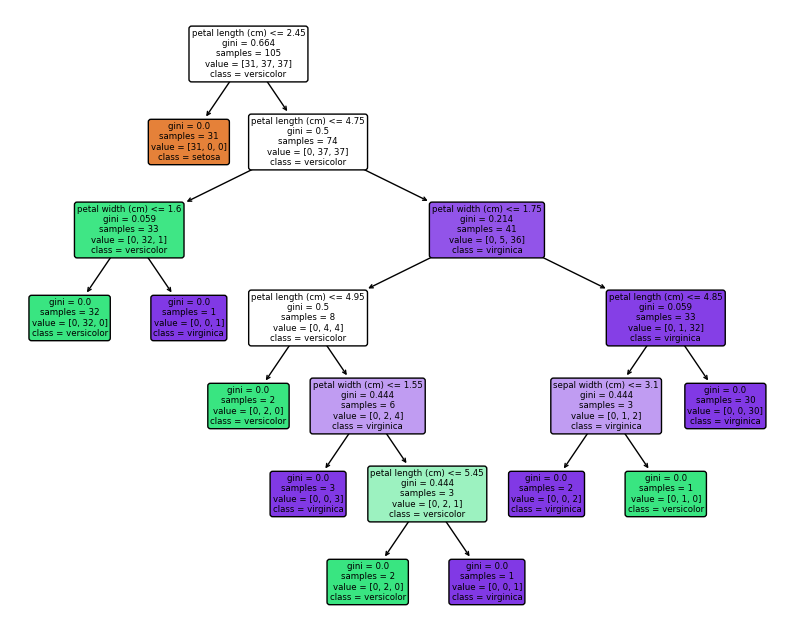

In [29]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

### Visualisation de l'Arbre de Décision avec paramètres modifiés

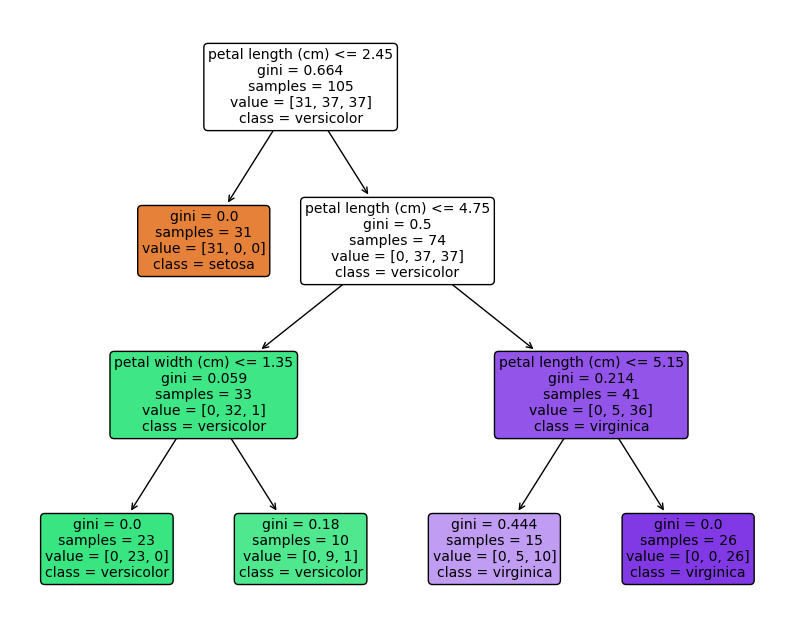

In [30]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf2, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

### Classification d'un nouvel échantillon

In [31]:
new_sample = [[5.5, 2.4, 3.8, 1.1]]  # Exemple d'iris avec certaines caractéristiques
predicted_class = clf.predict(new_sample)
print(f"La classe prédite pour le nouvel échantillon est: {iris.target_names[predicted_class][0]}")

La classe prédite pour le nouvel échantillon est: versicolor


### Classification d'un nouvel échantillon avec paramètres modifiés

In [32]:
new_sample = [[5.5, 2.4, 3.8, 1.1]]  # Exemple d'iris avec certaines caractéristiques
predicted_class = clf2.predict(new_sample)
print(f"La classe prédite pour le nouvel échantillon est: {iris.target_names[predicted_class][0]}")

La classe prédite pour le nouvel échantillon est: versicolor
